In [65]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [66]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part One: Clean Dataset, Obtain Training and Testing Data

In [108]:
dataset = pd.read_csv("pollution_income_race.csv")

def train_test_data(dataset):
    """
   This function is made to split data into training and testing data sets. It is split into 2/3 training data,
   1/3 testing data. 
   It is specific to our cleaned data set pollution_income_race.
    """
    dataset = dataset[dataset["City"] != "Not in a city"]

    dataset["AQI Binary"] = 1 * (dataset["AQI Total"] <= 100)

    #our labels are the AQI Binary for now
    y = dataset.loc[:,"AQI Binary"]

    #also going to drop states and cities for now, (and city) because we don't get a numerical from that
    dataset = dataset.drop(columns=["State_x", 
                              "County_x",
                              "City",
                               "State_y", 
                              "County_y", 
                              "AQI Total", 
                              "AQI Binary"])

    #finally, drop those features that directly contribute to AQI (i.e. NO2 Mean, NO2 1st Max Value)
    dataset = dataset.drop(columns=["NO2 Mean",
                             "NO2 1st Max Value",
                             "NO2 1st Max Hour",
                             "NO2 AQI",
                             "O3 Mean",
                             "O3 1st Max Value",
                             "O3 1st Max Hour",
                             "O3 AQI",
                             "SO2 Mean",
                             "SO2 1st Max Value",
                             "SO2 1st Max Hour",
                             "SO2 AQI",
                             "CO Mean",
                             "CO 1st Max Value",
                             "CO 1st Max Hour",
                             "CO AQI"])

    #train and test data
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test    

X_train, X_test, y_train, y_test = train_test_data(dataset)


In [110]:
X_train

,State Code,County Code,Date Local,Median Household Income,Total Pop,Total Male %,Total Female %,White Alone (M) %,White Alone (F) %,Black Alone (M) %,Black Alone (F) %,Am Indian+AK Native Alone (M) %,Am Indian+AK Native Alone (F) %,Asian Alone (M) %,Asian Alone (F) %,Nat. HI and PI (M) %,Nat. HI and PI (F) %,TOM_MALE
66,6,1,2002,113518.0,10021506,0.495390,0.504610,0.244432,0.238668,0.051896,0.056041,0.005613,0.005458,0.161241,0.171451,0.004578,0.004916,0.027631
835,32,3,2001,62496.0,13662646,0.500808,0.499192,0.349270,0.334776,0.065935,0.068644,0.006304,0.006135,0.048658,0.058518,0.004651,0.004758,0.025988
67,6,1,2003,113518.0,10021506,0.495390,0.504610,0.244432,0.238668,0.051896,0.056041,0.005613,0.005458,0.161241,0.171451,0.004578,0.004916,0.027631
447,6,95,2001,83678.0,2716962,0.501149,0.498851,0.300509,0.288954,0.074948,0.072824,0.006718,0.006442,0.076265,0.088328,0.005441,0.005261,0.037269
217,6,37,2012,75624.0,59665436,0.495714,0.504286,0.353743,0.349500,0.042930,0.046823,0.007591,0.007220,0.073381,0.082331,0.001828,0.001838,0.016241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,42,69,2002,56911.0,1294150,0.489517,0.510483,0.437606,0.461313,0.024152,0.021254,0.001740,0.001697,0.016049,0.016100,0.000323,0.000383,0.009646
1184,42,101,2005,55102.0,9562106,0.475856,0.524144,0.218985,0.226435,0.200090,0.235551,0.004473,0.004774,0.037813,0.041240,0.000867,0.000898,0.013629
1219,42,133,2000,71655.0,2743046,0.497499,0.502501,0.438321,0.443527,0.037588,0.036162,0.002079,0.001843,0.007190,0.008613,0.000395,0.000416,0.011926
924,36,103,2002,109084.0,9152726,0.495513,0.504487,0.416442,0.422438,0.043497,0.045976,0.003550,0.003241,0.021259,0.022082,0.000557,0.000519,0.010207


## Part Two: Determine Feature Importance 

In [69]:
def feature_importance(X_train, y_train):
    """
    This function determines the feature importance of each feature in the dataset and sorts them
    by importance using Logistic Regression.
    """
    
    LR = LogisticRegression()
    LR.fit(X_train, y_train)

    #get importance
    importances = pd.DataFrame(data = 
                               {'Attribute': X_train.columns,
                                'Importance': LR.coef_[0]
                               })

    importances.sort_values('Importance')
    
    return importances

importances = feature_importance(X_train, y_train)

<BarContainer object of 10 artists>

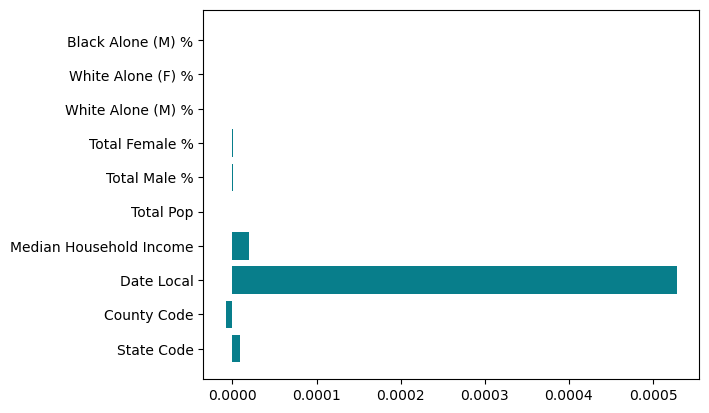

In [70]:
#plotting the importances in batches of 5

#first 10
importances10 = importances[0:10]
plt.barh(y=importances10['Attribute'], width=importances10['Importance'], color='#087E8B')

<BarContainer object of 8 artists>

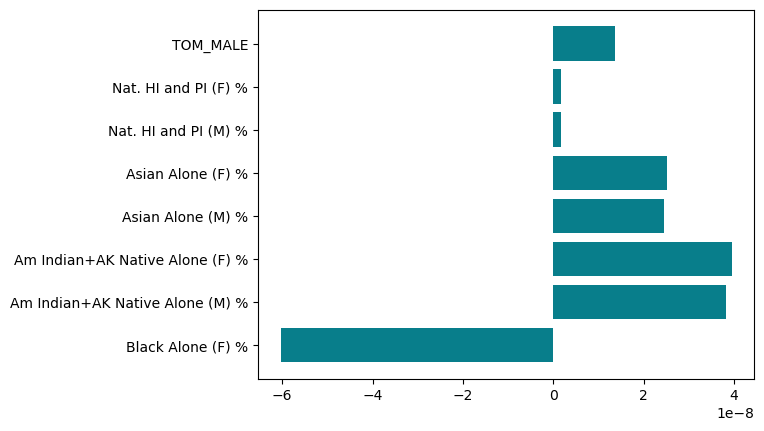

In [71]:
#second 8
importances20 = importances[10:18]
plt.barh(y=importances20['Attribute'], width=importances20['Importance'], color='#087E8B')

## Part Three: Looking at Accuracies of Different Models

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression()
LR.fit(X_train, y_train)

print("Training Accuracy:")
print(LR.score(X_train, y_train))

print("Testing Accuracy:")
print(LR.score(X_test, y_test))

Training Accuracy:
0.8916083916083916
Testing Accuracy:
0.8605200945626478


### Logistic Regression with Polynomial Features: Including Coefficients

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def poly_LR(degree, **kwargs):
    plr = Pipeline([("poly", PolynomialFeatures(degree = degree)),
                    ("LR", LogisticRegression(**kwargs))])
    return plr

    
plr = poly_LR(degree = 2, max_iter = 1000000)
plr.fit(X_train, y_train)
print("Training accuracy")
print(plr.score(X_train, y_train))

print("Testing accuracy")
print(plr.score(X_test, y_test))

Training accuracy
0.8916083916083916
Testing accuracy
0.8605200945626478


In [74]:
print("coefficients of model:")
print()
print(plr.named_steps['LR'].coef_)

print("biases of model:")
print(plr.named_steps['LR'].intercept_)

coefficients of model:

[[ 1.11276049e-23  2.70910398e-22  8.13314987e-22  2.23670684e-20
   8.26684574e-19  5.39082056e-17  5.49742047e-24  5.63018441e-24
   4.02195097e-24  4.05052126e-24  7.24190483e-25  7.90383926e-25
   1.21744623e-25  1.22740132e-25  4.17892468e-25  4.50642155e-25
   1.62466672e-26  1.60424146e-26  1.95395261e-25  9.71212566e-21
   2.50700099e-20  5.44539274e-19  1.86454545e-17  1.45297020e-15
   1.33430573e-22  1.37479824e-22  9.84446728e-23  9.97724228e-23
   1.94709841e-23  2.14792962e-23  3.46827391e-24  3.52705503e-24
   7.51825966e-24  8.05513764e-24  3.01250434e-25  2.97962788e-25
   4.22713223e-24  1.43266830e-19  1.63502000e-18  5.78155511e-17
   4.15345765e-15  4.01429417e-22  4.11885570e-22  2.88552987e-22
   2.89759055e-22  6.61993339e-23  7.31387587e-23  6.18024253e-24
   6.09656620e-24  2.60848784e-23  2.81342168e-23  9.93723991e-25
   9.77824669e-25  1.34182512e-23  4.49591622e-17  1.66155303e-15
   1.08558323e-13  1.10500506e-20  1.13170178e-20  8

### Support Vector Machine

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(gamma = "auto") 
svc.fit(X_train, y_train)

print("Training Accuracy:")
print(svc.score(X_train, y_train))

print("Test accuracy")
print(svc.score(X_test, y_test))

Training Accuracy:
0.9463869463869464
Test accuracy
0.9054373522458629


In [76]:
best_score = -np.inf
best_gamma = np.inf

for gammas in 6**(np.arange(-4,4, dtype = float)):
    svc = SVC(gamma = gammas)
    scores = cross_val_score(svc, X_train, y_train,cv=8)
    if scores.mean()>best_score:
        best_score = scores.mean()
        best_gamma = gammas
        
print(best_score, best_gamma)

0.9114096573208723 0.027777777777777776


In [91]:
svc_model = SVC(gamma = .027777777777777776)
svc_model.fit(X_train,y_train)

print("training accuracy")
print(svc_model.score(X_train,y_train))
print("testing")
print(svc_model.score(X_test,y_test))

training accuracy
0.9358974358974359
testing
0.9054373522458629


### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

best_score = -np.inf
maximum = 0

for depth in range(2,25):
    tree = DecisionTreeClassifier(max_depth = depth)
    #scores = cross_val_score(tree, X_train[subset], y_train, cv = 11)

    scores = cross_val_score(tree, X_train, y_train, cv = 9)
    if scores.mean() > best_score:
        best_score = scores.mean()
        maximum = depth
print(best_score, maximum)

0.8973684210526316 5


In [79]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train,y_train)
print("training")
print(tree.score(X_train,y_train))
print("testing")
print(tree.score(X_test,y_test))

training
0.9335664335664335
testing
0.900709219858156


## Part 4: Visualization of Data

First, let's explore our data a bit by visualizing the AQI, Median Income, and some racial demographics using maps. (might want this at the begninng of the blog post)

Having issues zooming in on the matplot lib

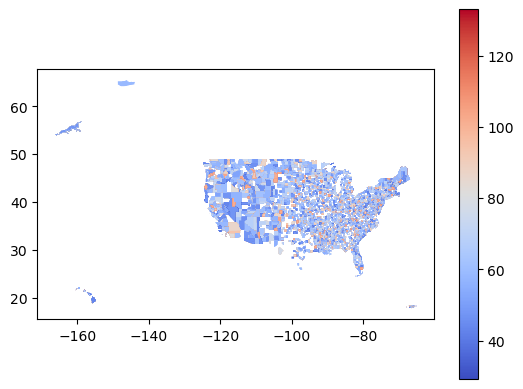

In [80]:
from mapping import Mapping
import pandas as pd

df = pd.read_csv("pollution_income_race.csv", index_col = 0)
df = df.dropna()

mp = Mapping()

#plot_df(dataframe, column, cmap colorscheme)
mp.plot_df(df, "AQI Total", "coolwarm")

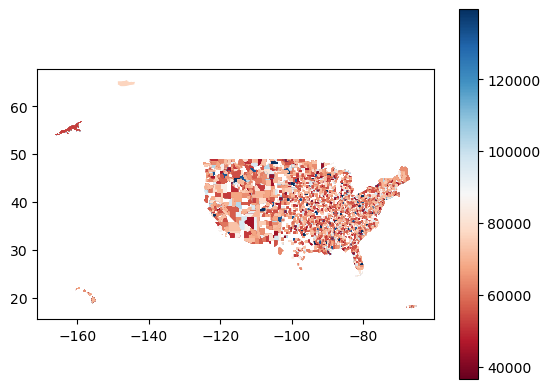

In [81]:
mp.plot_df(df, "Median Household Income", "RdBu")

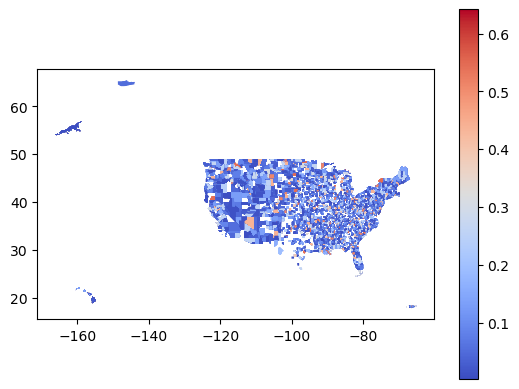

In [82]:
mp.plot_df(df, "black_alone_percent", "coolwarm")

## Our testing data

Next, let's visualize our binary predictions compared to the actual AQI (want to label these, zoom, etc)

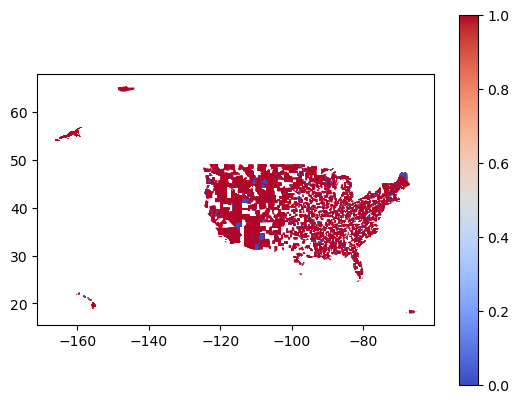

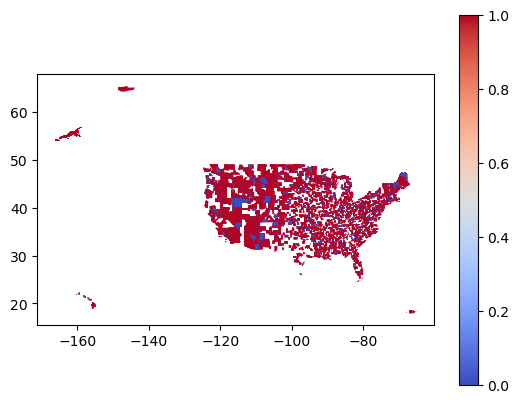

In [118]:
#creating dataframe with test data, labels, and predictions
test_combined["Predicted AQI Binary"] = svc_model.predict(X_test)
test_combined["Actual AQI Binary"] = y_test

#plotting predictions
mp.plot_df(test_combined, "Predicted AQI Binary", "coolwarm")

#plotting actual 
mp.plot_df(test_combined, "Actual AQI Binary", "coolwarm")

## Part 5: Analysis